When you have more than two classes as an option, its, known as multi-class classification.


Fashion company -> Classify diferent image of clothing

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



In [ ]:
#View the shape
X_train[0].shape, y_train[0].shape

(28, 28)

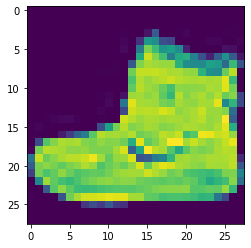

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

Text(0.5, 1.0, 'T-shirt')

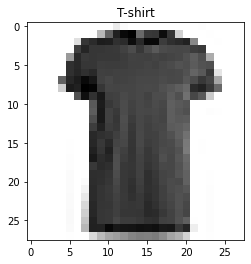

In [ ]:
#Create the list of index of what is each labels means
class_names = ["T-shirt", "Trouser", "Pullover", " Dress", "Coat", "Sanda", "Shirt", "Sneaker", "Bag", "Anckle boot"]

#Image and its label

plt.imshow(X_train[17], cmap=plt.cm.binary)
plt.title(class_names[y_train[17]])

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax"),
                               
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


history = model_1.fit(X_train,y_train, epochs = 10, validation_data =(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
predict = model_1.predict(X_test) 
predict[0]


# plt.imshow(X_test[0], cmap=plt.cm.binary)
# plt.title(class_names[predict[0]])

array([7.9278105e-11, 0.0000000e+00, 0.0000000e+00, 2.4451529e-18,
       0.0000000e+00, 2.3362195e-02, 6.7842422e-21, 6.4880723e-01,
       4.4508079e-07, 3.2783014e-01], dtype=float32)

Now we normalize our data to fit better the model (Data to 0 & 1)

In [ ]:
X_train.min() , X_train.max()

(0, 255)

In [ ]:
X_train_norm = X_train/ 225.0
X_test_norm = X_test/ 225.0

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax"),
                               
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


norm_history = model_2.fit(X_train_norm,
                           y_train, epochs = 10, 
                           validation_data =(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0406 - accuracy: 0.6434 - val_loss: 0.6952 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.7790 - val_loss: 0.6457 - val_accuracy: 0.7840
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.7940 - val_loss: 0.6275 - val_accuracy: 0.7784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5751 - accuracy: 0.8000 - val_loss: 0.6145 - val_accuracy: 0.7878
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5647 - accuracy: 0.8021 - val_loss: 0.6231 - val_accuracy: 0.7879
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.8052 - val_loss: 0.5885 - val_accuracy: 0.7953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5491 - accuracy: 0.8080 - val_loss: 0.6100 - val_accuracy:

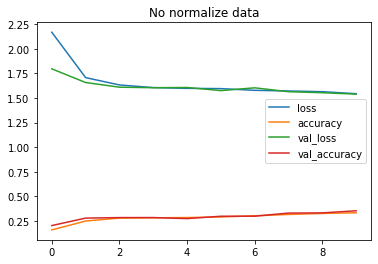

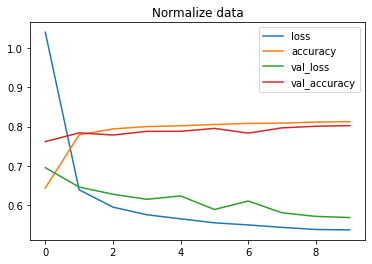

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(title =  "No normalize data")
pd.DataFrame(norm_history.history).plot(title =  "Normalize data")


*Ideal learning rate*

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax"),
                               
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10**(epoch/20))


norm_history = model_2.fit(X_train_norm,
                           y_train, epochs = 40, 
                           validation_data =(X_test_norm, y_test),
                           callbacks = [lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0406 - accuracy: 0.6434 - val_loss: 0.6952 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6378 - accuracy: 0.7790 - val_loss: 0.6471 - val_accuracy: 0.7829 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5940 - accuracy: 0.7930 - val_loss: 0.6312 - val_accuracy: 0.7735 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5757 - accuracy: 0.7990 - val_loss: 0.6192 - val_accuracy: 0.7867 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5668 - accuracy: 0.8002 - val_loss: 0.6066 - val_accuracy: 0.7906 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5579 - accuracy: 0.8038 - val_loss: 0.5935 - val_accuracy: 0.7926 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

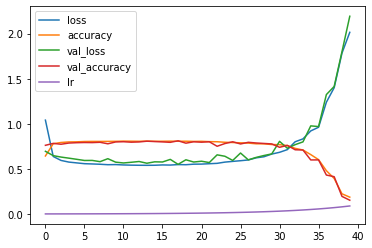

In [ ]:
pd.DataFrame(norm_history.history).plot()


Text(0, 0.5, 'Loss')

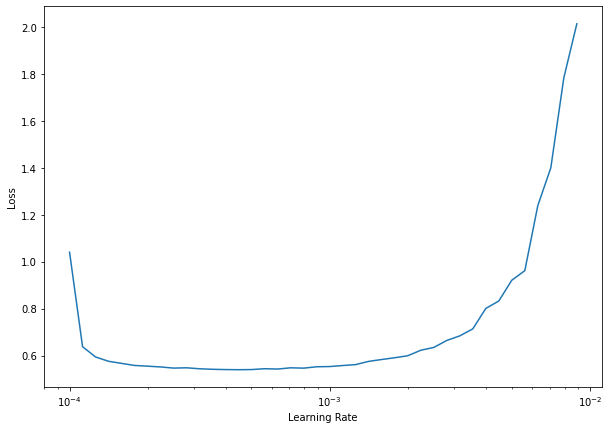

In [ ]:
lrs = 1e-4 *(10**(tf.range(40)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs,norm_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

So we can see thaht the best learning rate is 0,001 with arround 15-25 epochs

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax"),
                               
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])




norm_history_4= model_4.fit(X_train_norm,
                           y_train, epochs = 20, 
                           validation_data =(X_test_norm, y_test),
                           callbacks = [lr_scheduler])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0406 - accuracy: 0.6434 - val_loss: 0.6952 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6378 - accuracy: 0.7790 - val_loss: 0.6471 - val_accuracy: 0.7829 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5940 - accuracy: 0.7930 - val_loss: 0.6312 - val_accuracy: 0.7735 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5757 - accuracy: 0.7990 - val_loss: 0.6192 - val_accuracy: 0.7867 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5668 - accuracy: 0.8002 - val_loss: 0.6066 - val_accuracy: 0.7906 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5579 - accuracy: 0.8038 - val_loss: 0.5935 - val_accuracy: 0.7926 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


figsize = (10,10)


def make_confusion_matrix(y_true, y_pred, classes = None , figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_test,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

  n_clases = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm , cmap = plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True label",
        xticks = np.arange(n_clases),
        yticks = np.arange(n_clases),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  threshold = (cm.max() + cm.min())/2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i,j]> threshold else"black",
            size = text_size)
    



In [ ]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 ' Dress',
 'Coat',
 'Sanda',
 'Shirt',
 'Sneaker',
 'Bag',
 'Anckle boot']

In [ ]:
y_prob_2 = model_4(X_test_norm)


y_preds_2 = tf.argmax(y_prob_2 , axis=1)

y_preds_2[:10], y_test[:10]


(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>,
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [ ]:
model_4.evaluate(X_test_norm,y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.5763 - accuracy: 0.8007


[0.5763148069381714, 0.8007000088691711]

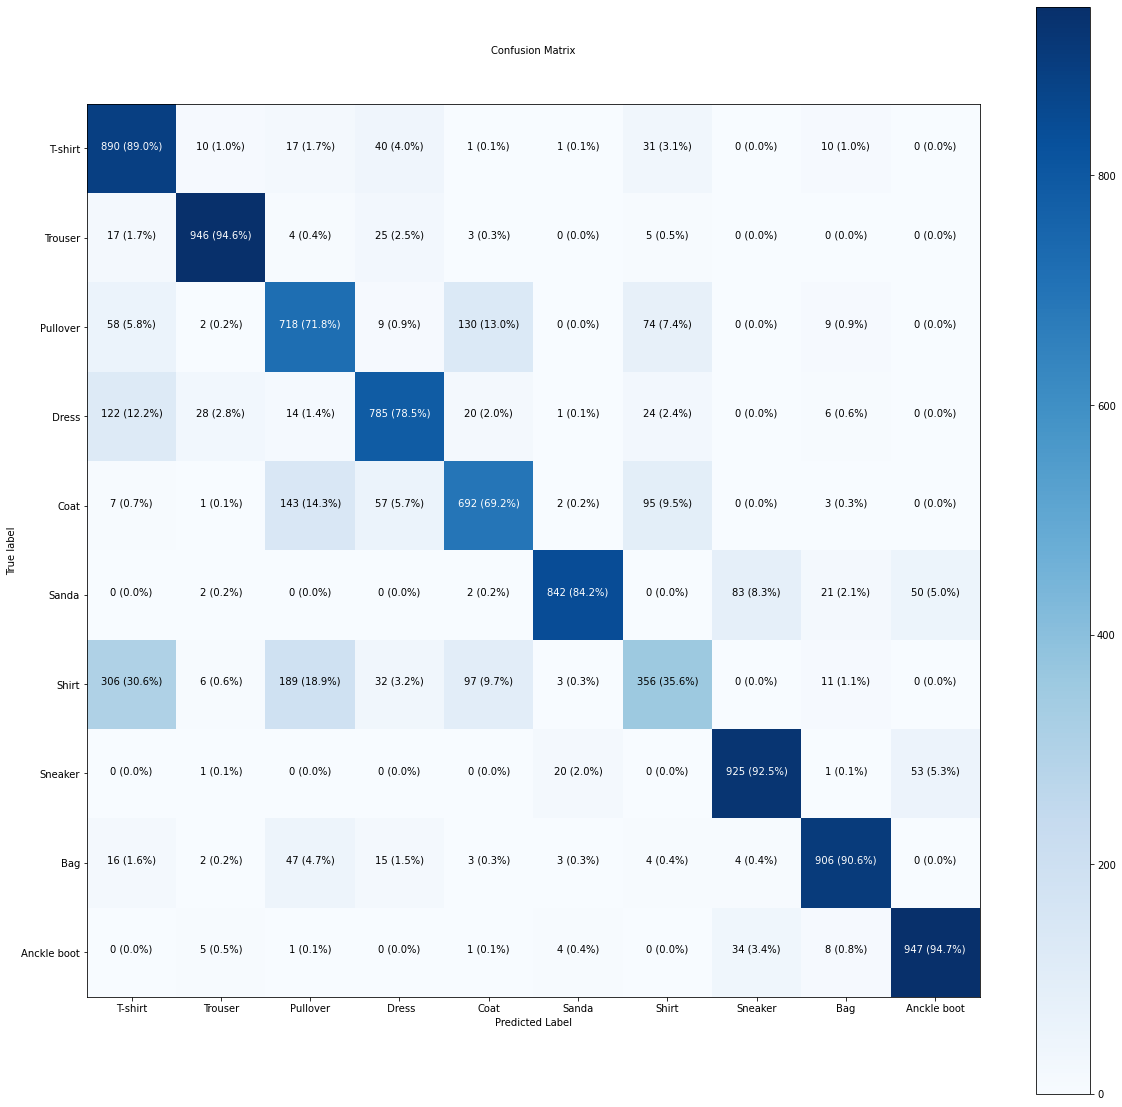

In [ ]:
make_confusion_matrix(y_true = y_test, y_pred =y_preds_2 , classes = class_names, figsize=(20,20), text_size=10)